In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the dataset

In [2]:
data = pd.read_csv(r"C:\Users\VSSRT\Desktop\IBM Project folder\datasets\Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Task-1 Univariate analysis

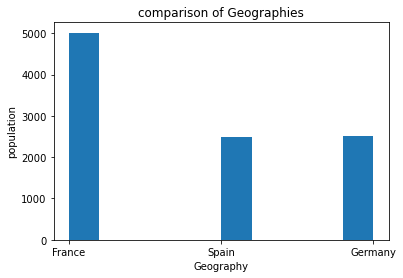

In [16]:
plt.hist(x = data.Geography, bins = 10)
plt.title('comparison of Geographies')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

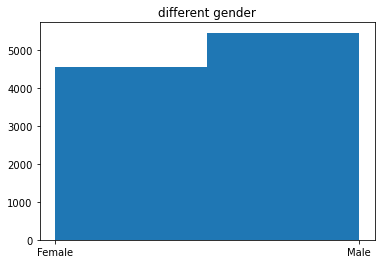

In [9]:
plt.hist(x = data.Gender, bins = 2)
plt.title('different gender')
plt.show()

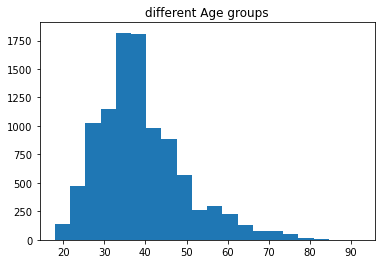

In [12]:
plt.hist(x = data.Age, bins =20)
plt.title('different Age groups')
plt.show()

## Bi-Variate task 2

<AxesSubplot:xlabel='HasCrCard'>

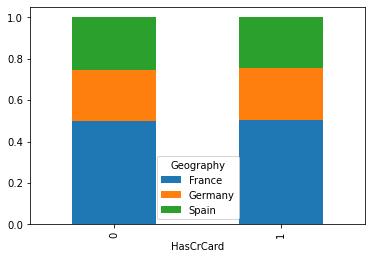

In [20]:
# geography and credit score
Geography = pd.crosstab(data['HasCrCard'],data['Geography'],)
Geography.div(Geography.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='IsActiveMember'>

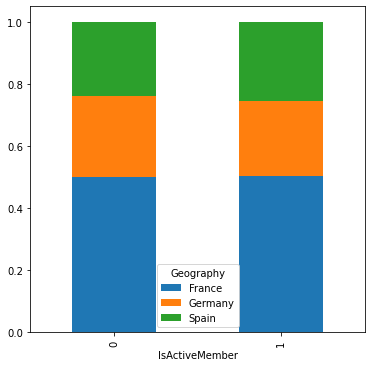

In [21]:
IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize= (6, 6))

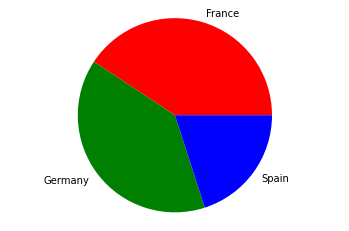

In [23]:
labels = 'France', 'Germany', 'Spain'
colors = ['red','green','blue']
sizes =  [data.Balance[data.Geography == 'France'].sum(), data.Balance[data.Geography == 'Germany'].sum(),  data.Balance[data.Geography == 'Spain'].sum()]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels)

plt.axis('equal')
plt.show()

# Multi variate Task-3

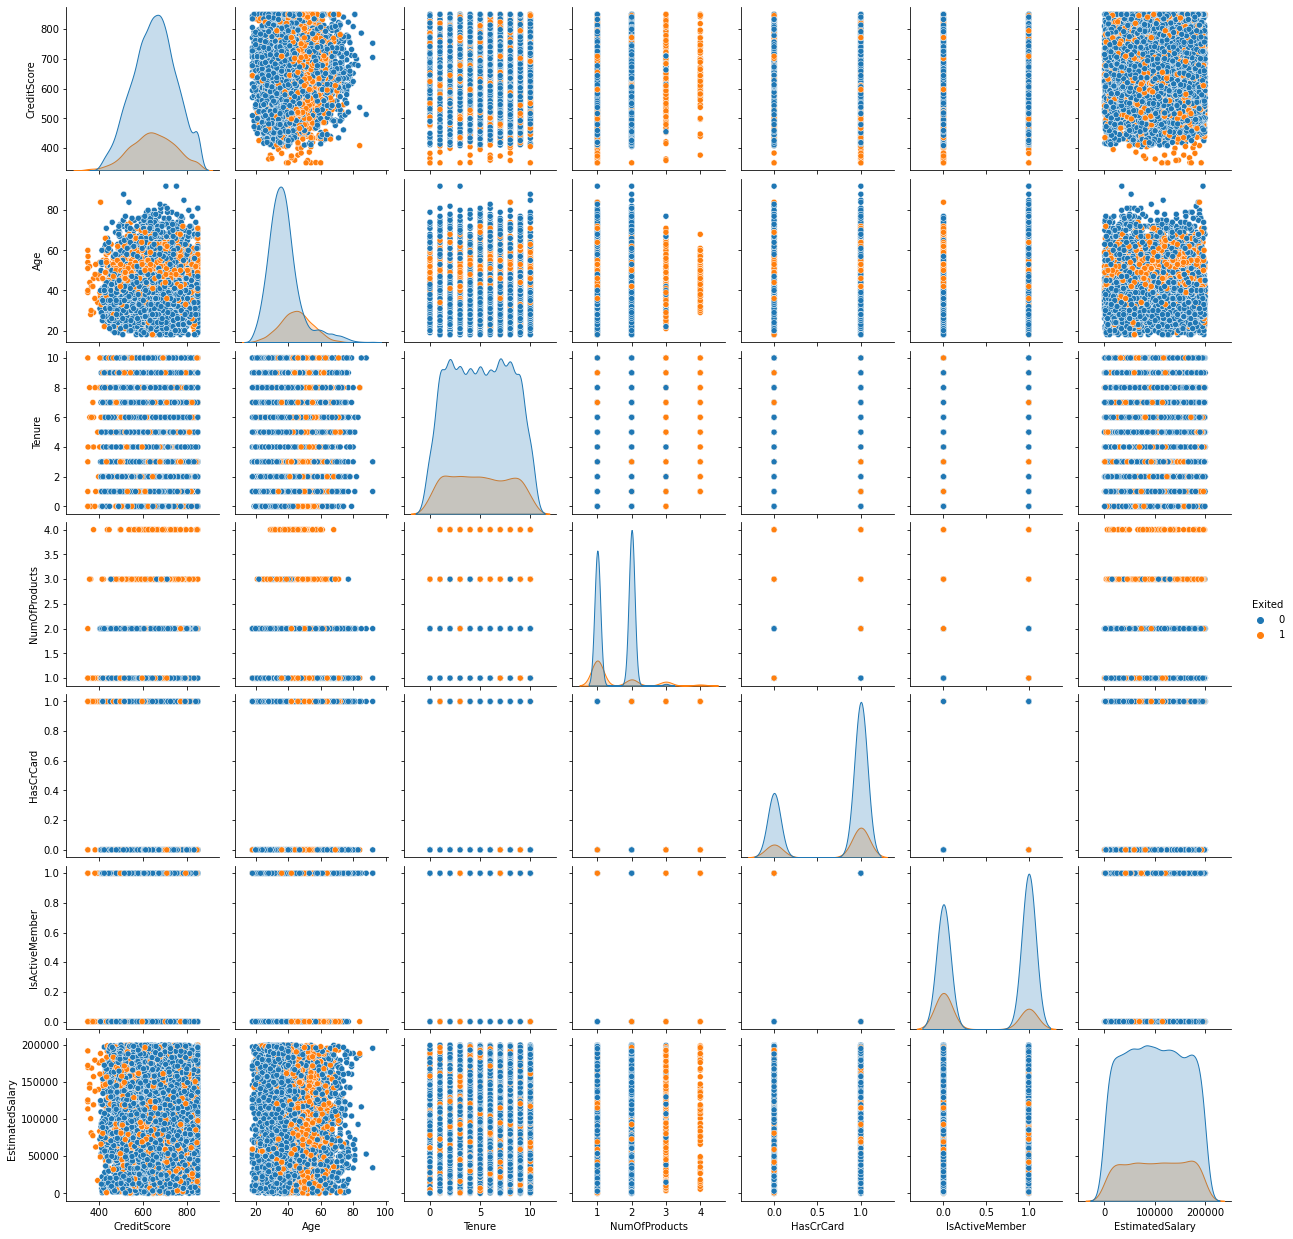

In [28]:
sns.pairplot(data=data[['CreditScore','Geography','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']], hue='Exited')

## 4. Desriptive analysis

In [29]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handling missing values

In [30]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

####  0 missing values

# 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='Age'>

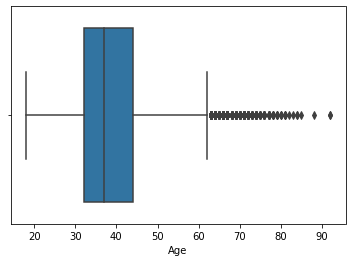

In [31]:
sns.boxplot(data = data, x = 'Age')

<AxesSubplot:xlabel='EstimatedSalary'>

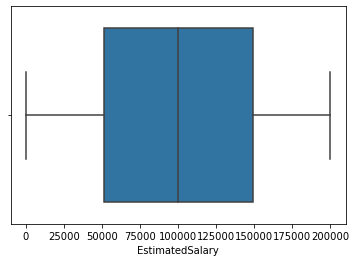

In [32]:
sns.boxplot(data = data, x = 'EstimatedSalary')

# 7. Check for Categorical columns and perform encoding

In [36]:
x = data.iloc[:,0:10]
y = data.iloc[:,10]

x = pd.get_dummies(x)
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,Surname_Abazu,Surname_Abbie,Surname_Abbott,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# 8. Split the data into dependent and independent variables.

In [37]:
x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)

(10000, 10)
(10000,)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts'],
      dtype='object')


# 9. Scale the independent variables

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
0,-0.702176,-1.343330,-0.735507,0.015266,0.008860,0.673160,2.535034,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,-1.485722,1.558330,1.024427,-0.652609,0.008860,-1.207724,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,-0.524522,-0.655156,0.808295,-0.461788,1.393293,-0.356937,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,-1.167396,1.200594,0.396614,-0.080145,0.008860,-0.009356,-0.926551,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-1.451159,0.778798,-0.467915,1.255605,0.701077,-1.207724,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,-0.919743,0.919743


# 10. Split the data into training and testing

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 2944)
(7500,)
(2500, 2944)
(2500,)
